[Analytics Vidhya](https://www.analyticsvidhya.com/blog/2022/03/multiple-linear-regression-using-python/)

[Kaggle Reference](https://www.kaggle.com/code/mahyamahjoob/real-estate-valuation-using-polynomial-regression/notebook)

I am using multi-variate linear regression to predict Valuation of house with a dependent variables,
Python Library as you can see below, i have used seaborn, matplotlib, sklearn, pandas, numpy

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore") 

In [2]:
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [3]:
""" Reading File Path """
path = r'Real estate valuation data set.xlsx'

In [4]:
    """
    Loading Dataset into Dataframe
    """

data = pd.read_excel(path)

In [5]:
# Data frame head, 5 rows

data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
#dataframe info functions tell us about column name and type and non-null count 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
# renaming columns name to more readable format

data.rename(columns={"X1 transaction date": "transaction date", 
                     "X2 house age": "house age", 
                     "X3 distance to the nearest MRT station": "distance to the nearest MRT station",
                     "X4 number of convenience stores":"number of convenience stores",
                     "X5 latitude":"latitude",
                     "X6 longitude":"longitude",
                     "Y house price of unit area": "house price of unit area"
                     }, inplace=True)

In [8]:
#checking names

data.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

In [9]:
# checking duplicated and counting the total
data.duplicated().count()

414

In [10]:
# no. of unique values

data.nunique()

No                                     414
transaction date                        12
house age                              236
distance to the nearest MRT station    259
number of convenience stores            11
latitude                               234
longitude                              232
house price of unit area               270
dtype: int64

In [11]:
# Summing null values in all cols 

data.isnull().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [12]:
# shape of dataframe

data.shape

(414, 8)

In [13]:
#checking dataframe skew

data.skew()

No                                     0.000000
transaction date                      -0.150834
house age                              0.382926
distance to the nearest MRT station    1.888757
number of convenience stores           0.154607
latitude                              -0.438598
longitude                             -1.219591
house price of unit area               0.599853
dtype: float64

In [14]:
"""
    here we are making a array of dataframe correlation
"""

mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [15]:
#checking correlation b/w this two cols

data['distance to the nearest MRT station'].corr(data['house price of unit area'])

-0.6736128553689182

In [16]:
##checking correlation b/w this two cols
data['number of convenience stores'].corr(data['house price of unit area'])

0.5710049111111483

In [17]:
# all the pairplots
"""
sns.pairplot(data)
plt.show()
"""

'\nsns.pairplot(data)\nplt.show()\n'

In [18]:

"""
    
# jointplot in respect to x and y cols names are mentioned below 

sns.jointplot(x='distance to the nearest MRT station', y='house price of unit area', data=data)
plt.show()
"""

"\n    \n# jointplot in respect to x and y cols names are mentioned below \n\nsns.jointplot(x='distance to the nearest MRT station', y='house price of unit area', data=data)\nplt.show()\n"

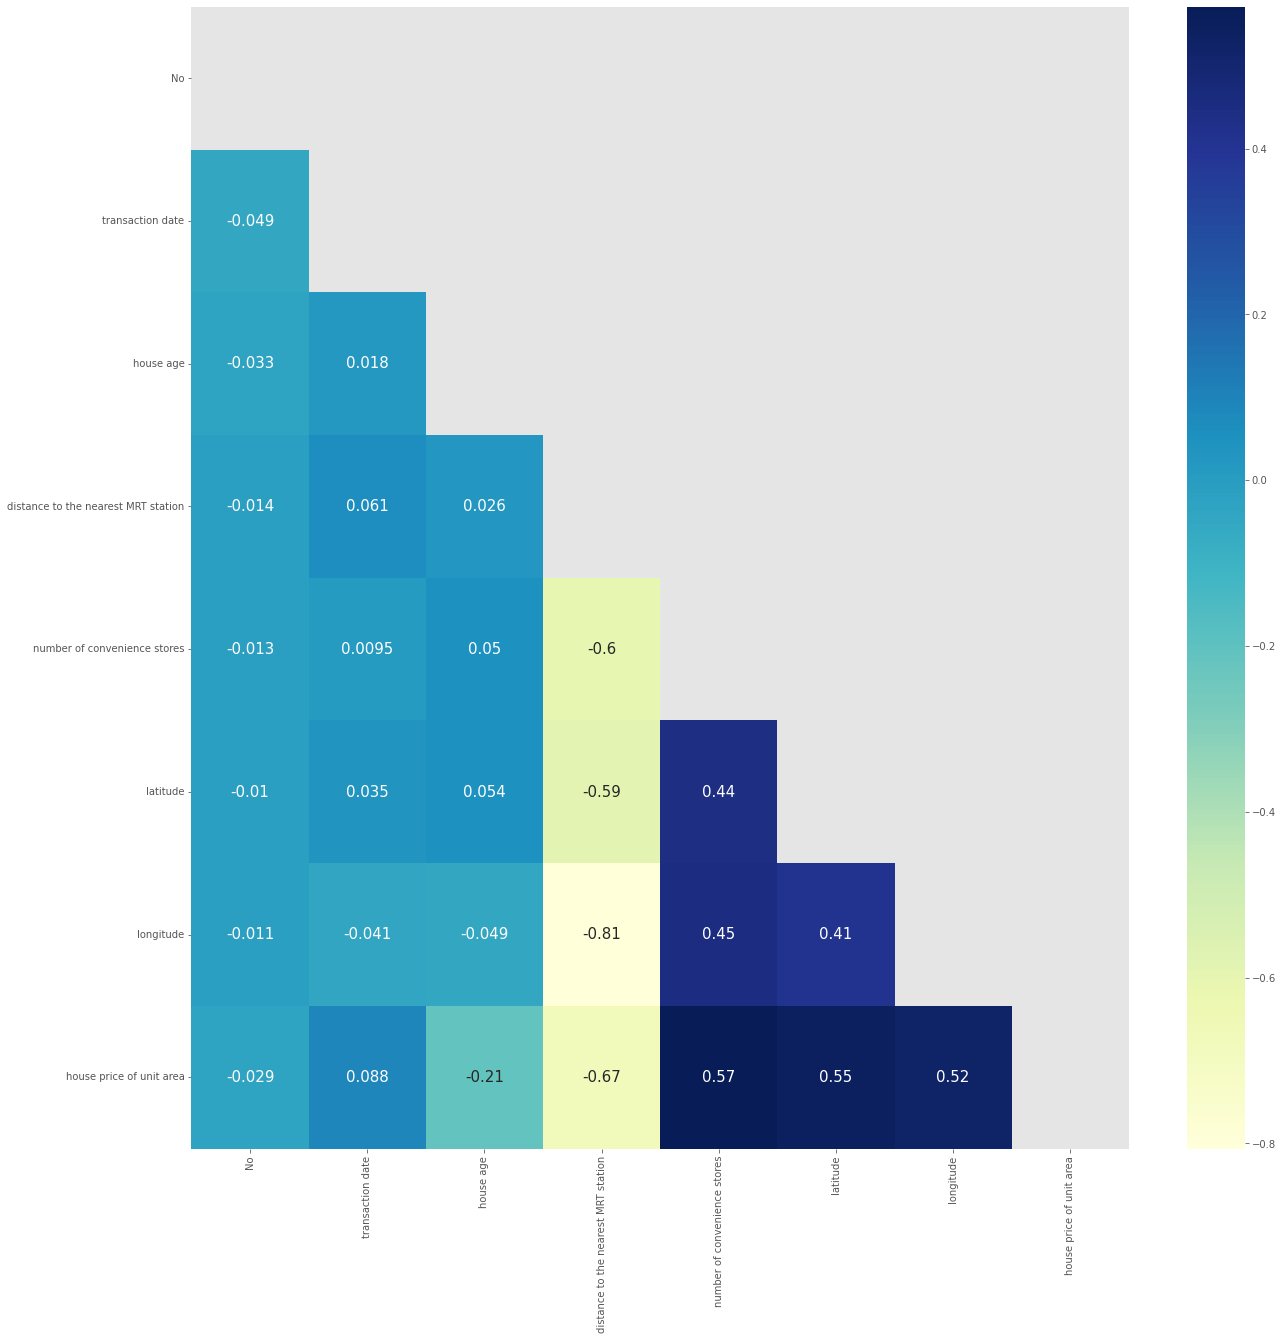

In [19]:
    """
    With help of above array we hide the repeating cols in our heatmap
    """
plt.figure(figsize=(21,21))
ax = sns.heatmap(data.corr(), mask=mask, annot = True, annot_kws={"size": 15}, cmap = 'YlGnBu')
plt.show()

In [20]:
#displot for the cols, using for loop of iterating over cols
"""
for i in data.columns:
    sns.displot(data[i])
    plt.show()
    
"""

'\nfor i in data.columns:\n    sns.displot(data[i])\n    plt.show()\n    \n'

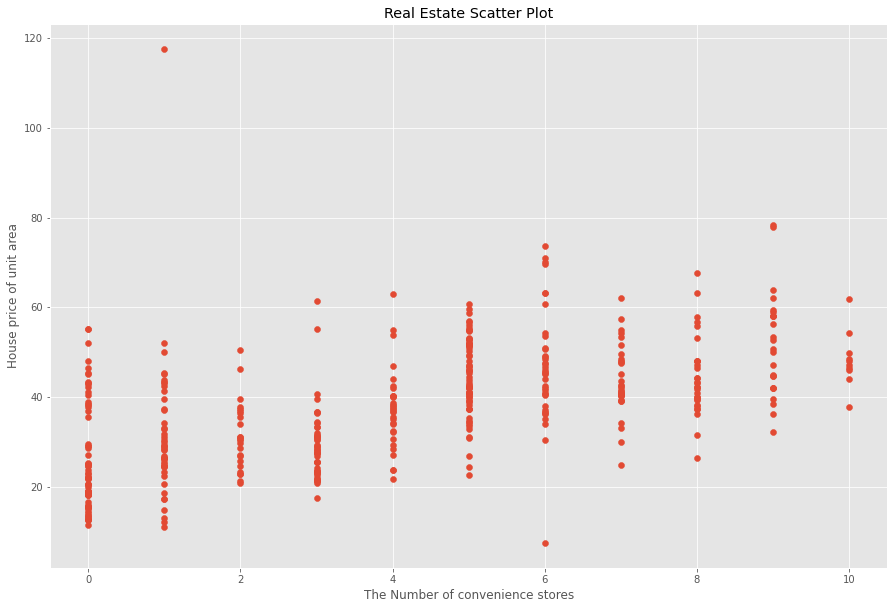

In [21]:
#scatter plots

plt.figure(figsize=(15,10))
plt.scatter(x=data['number of convenience stores'], y=data['house price of unit area'])
plt.xlabel('The Number of convenience stores')
plt.ylabel('House price of unit area')
plt.title('Real Estate Scatter Plot')
plt.show()

In [22]:
"""
# Implot with regression line

sns.lmplot(x='number of convenience stores', y='house price of unit area',
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'}, data=data)

plt.show()
"""

"\n# Implot with regression line\n\nsns.lmplot(x='number of convenience stores', y='house price of unit area',\n           scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'}, data=data)\n\nplt.show()\n"

In [23]:
"""
sns.lmplot(x='distance to the nearest MRT station', y='house price of unit area',
           scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'}, data=data)

plt.show()
"""


"\nsns.lmplot(x='distance to the nearest MRT station', y='house price of unit area',\n           scatter_kws={'alpha': 0.6}, line_kws={'color': 'blue'}, data=data)\n\nplt.show()\n"

In [24]:
data.drop(columns='No', inplace=True)

In [25]:
x = data.drop(columns=['house price of unit area', 'transaction date', 'latitude', 'longitude'], axis=1)
y = data['house price of unit area']

In [26]:
features = np.array(x).reshape(-1, 3)

In [27]:
#features

In [28]:
prices = np.array(y)

In [29]:
#prices

In [30]:
    """
    spiliting dataset into training and test, reshaping array using numpy
    """
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.25, random_state=100)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((310, 3), (104, 3), (310,), (104,))

In [31]:
    """
    Importing Sklearn Regression model
    """

from sklearn.linear_model import LinearRegression
from sklearn import metrics
regr = LinearRegression(fit_intercept=True)

In [32]:
#fitting our training data into model 

regr.fit(X_train, y_train)

LinearRegression()

In [33]:
#loading prediction result for our test data into y_pred

y_pred = regr.predict(X_test)

In [34]:
    """
    As you can see the test data accuracy is 65.94% 
    """
print(f"{regr.score(X_test, y_test):.2%}")

61.47%


In [35]:
    """
    check performance metrics
    """

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.830975
MSE,54.255359
RMSE,7.365824


In [36]:
# residuals from test data - predicted data using test data

test_residuals = y_test - y_pred

In [37]:
pred_values_difference = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':test_residuals})

In [38]:
pred_values_difference

,Actual Value,Predicted Value,Difference
0,48.0,43.568546,4.431454
1,31.3,34.419184,-3.119184
2,59.5,52.324788,7.175212
3,34.1,39.444524,-5.344524
4,48.6,49.525871,-0.925871
...,...,...,...
99,17.4,6.600372,10.799628
100,40.8,41.817961,-1.017961
101,37.9,42.741396,-4.841396
102,60.7,46.615230,14.084770


Text(0, 0.5, 'Y-Pred')

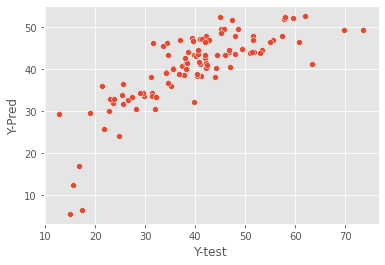

In [39]:
#plotting residual

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-test')
plt.ylabel('Y-Pred')


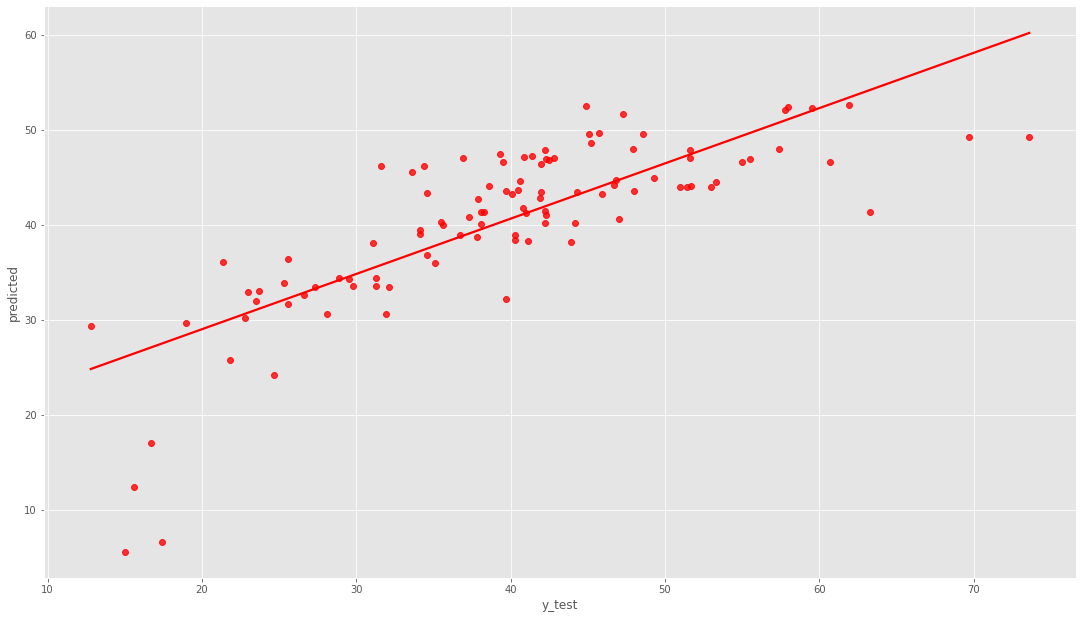

In [40]:
#sns.set_style('ticks')


fig = sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
fig.figure.set_size_inches(18.5, 10.5)
fig.set(xlabel='y_test', ylabel='predicted')
sns.despine()

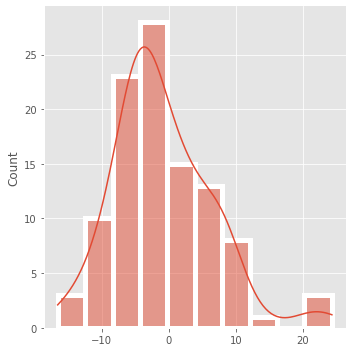

In [41]:
# residual displot

sns.displot(test_residuals, bins=10, kde=True, edgecolor='white', linewidth=5) 

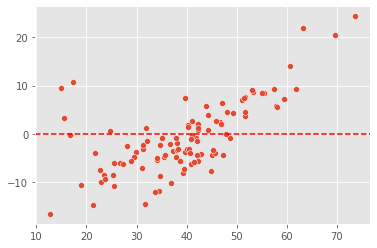

In [42]:
# Scatter plot for residual and plotting a horizontal line across the axis

sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')


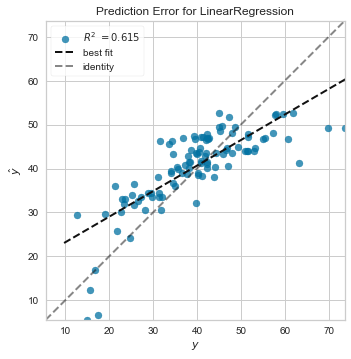

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [43]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(regr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

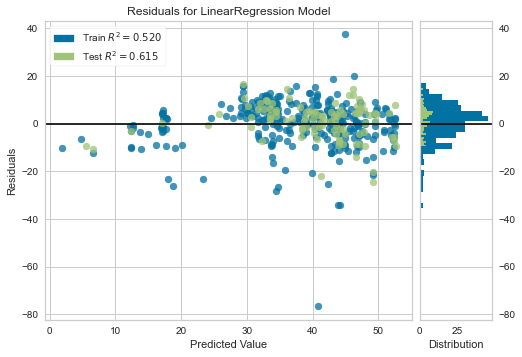

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = data[['house age','distance to the nearest MRT station', 'number of convenience stores']]
y = data['house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 7.834678866670054
R^2:  0.6523611295731628


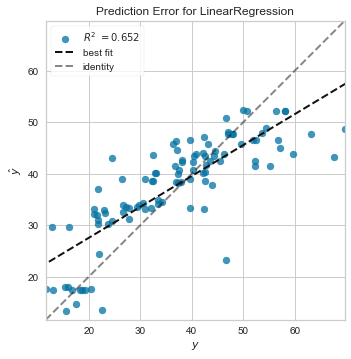

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
visualizer = PredictionError(lm6)


visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

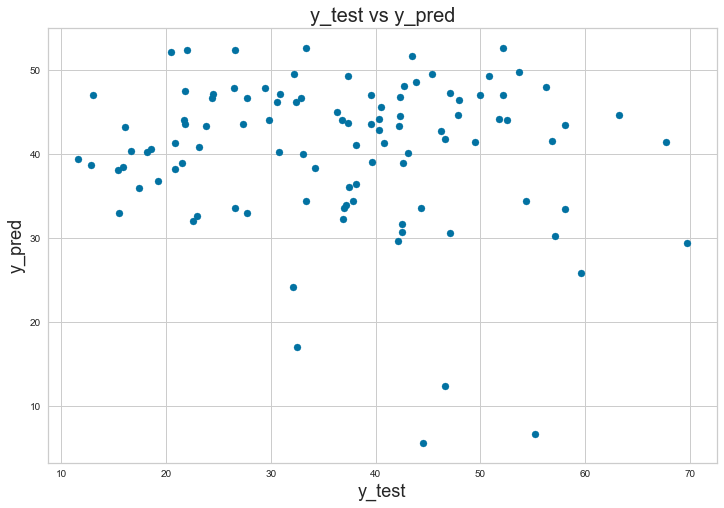

In [47]:

plt.figure(figsize=(12,8))
plt.scatter(np.array(y_test), y_pred)
plt.title('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test' ,fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 18)  
plt.show()


In [48]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [49]:
lm = LinearRegression()
score = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
np.mean(score)

0.4838755404618741

In [50]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
np.mean(scores)

0.512226559272768

In [51]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
np.mean(scores)

-98.62301199436938

In [52]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 7))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)     

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6]}],
             return_train_score=True, scoring='r2', verbose=1)

In [65]:
model_cv.best_params_

{'n_features_to_select': 3}

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.iloc[0::3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005196,0.001312,0.001988,0.001982,1,{'n_features_to_select': 1},0.360558,0.292477,0.408706,0.192996,...,0.328681,0.078409,6,0.306332,0.318266,0.295191,0.371199,0.296225,0.317443,0.028140
3,0.002996,0.001106,0.001980,0.001086,4,{'n_features_to_select': 4},0.492217,0.534364,0.615584,0.348835,...,0.512227,0.091239,1,0.500156,0.494339,0.477331,0.571300,0.483254,0.505276,0.033973


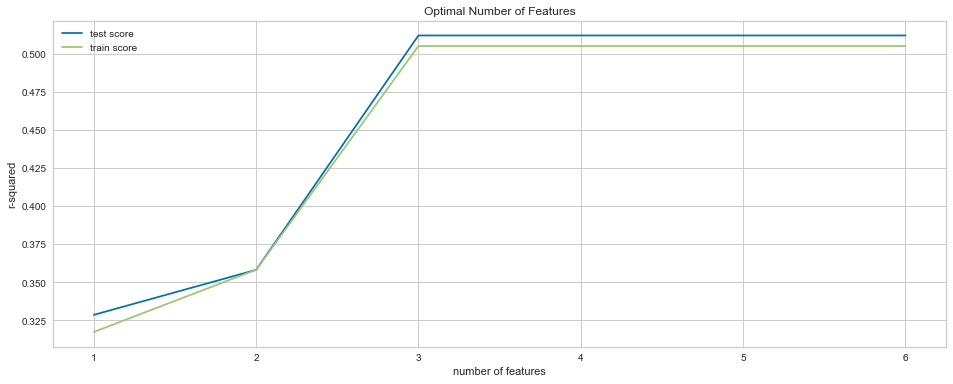

In [54]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [55]:
x_two = data.drop(columns=['house price of unit area', 'transaction date'], axis=1)


In [56]:
features_two = np.array(x_two).reshape(-1, 5)

In [57]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(features_two, prices, test_size=0.30, random_state=100)

In [58]:
#fitting our training data into model 

regr_t = LinearRegression()

regr_t.fit(X_train_t, y_train_t)

LinearRegression()

In [59]:
print(f"{regr_t.score(X_test_t, y_test_t):.2%}")

65.91%


In [60]:
y_pred_t = regr_t.predict(X_test_t)

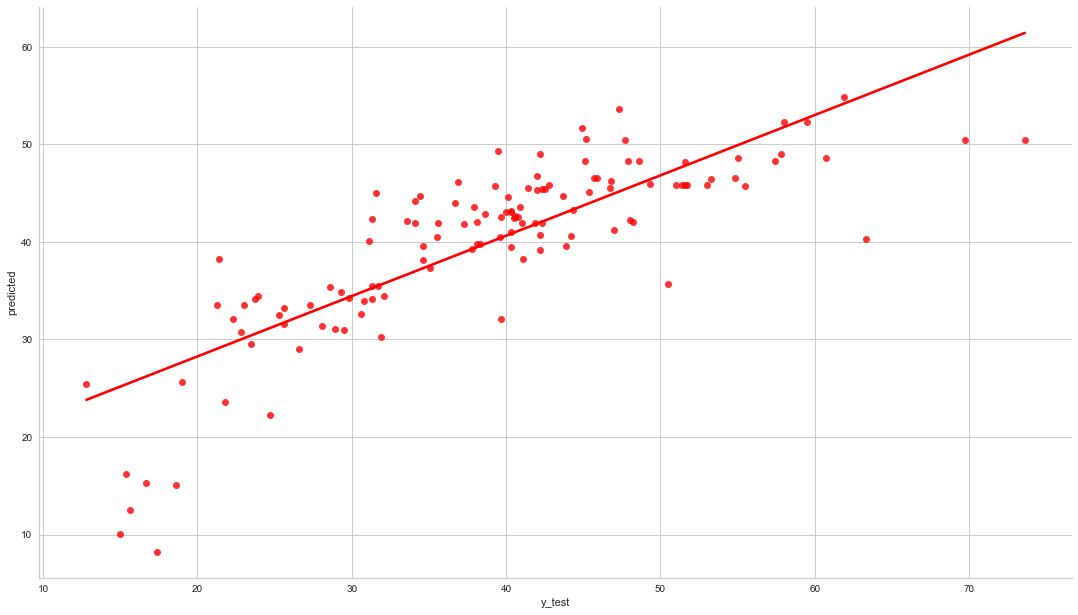

In [61]:
fig = sns.regplot(x=y_test_t,y=y_pred_t,ci=None,color ='red')
fig.figure.set_size_inches(18.5, 10.5)
fig.set(xlabel='y_test', ylabel='predicted')
sns.despine()